In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import re
import matplotlib.font_manager as fm

# CSV 불러오기
df = pd.read_csv('real2.csv')


In [4]:
print(df.columns)

Index(['id', 'url', 'url_images', 'title', 'safety_info', 'ingredients',
       'directions', 'brand', 'flavor', 'supplement_type', 'quantity',
       'product_form', 'average_rating', 'total_reviews',
       'rating_distribution', 'image_link', 'total_price', 'price_value',
       'diet_type', 'vegan', 'first_available_date', 'manufacturer',
       'country_of_origin', 'sales_ranks', 'popularity_score',
       'parsed_ingredients', 'tag', 'category', '재료_전처리'],
      dtype='object')


In [ ]:
# 재료_5 TF-IDF 벡터화
df['재료_전처리'] = df['재료_전처리'].fillna('')
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['재료_전처리'])  # 희소행렬 형태로 저장됨, 재료_5가 NaN인 행 제거된 컬럼.
print(tfidf_matrix.shape)

feature_names = vectorizer.get_feature_names_out() #

(901, 3780)


,Keyword,Count
9,피로회복,500
4,신경,486
3,소화,433
7,혈액,370
5,성장,289
8,항산화,278
2,뼈,272
1,면역,175
0,눈,96
6,피부,85


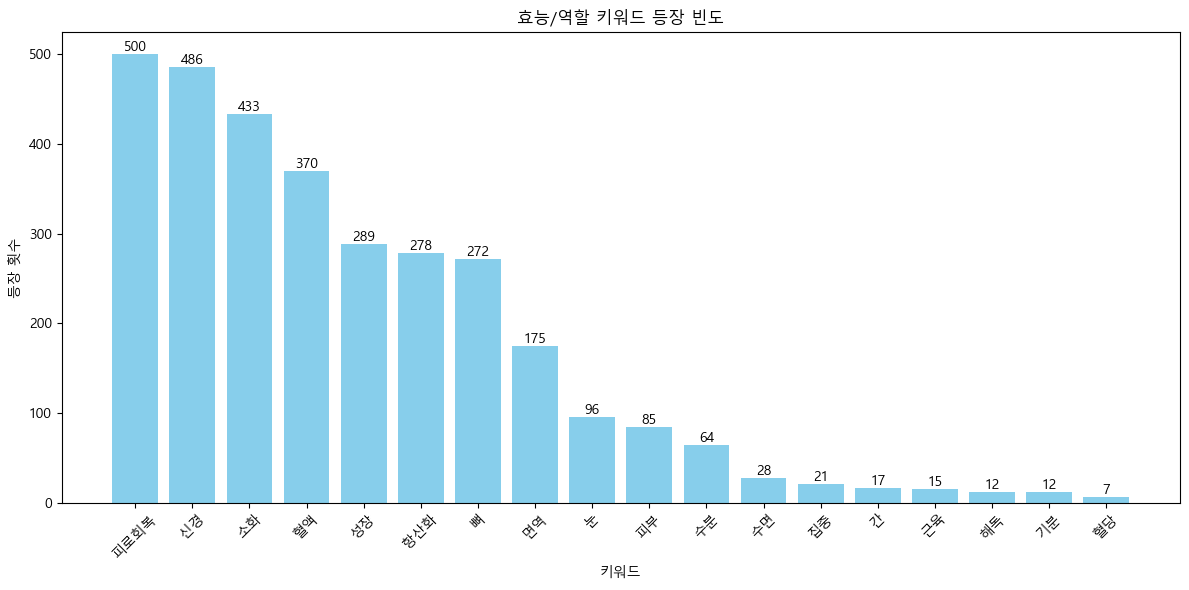

In [6]:
# 한글 폰트 설정 (윈도우 예시)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_prop)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 2. 세고 싶은 키워드 리스트
keywords = [
    '간', '기분', '근육', '눈', '면역', '뼈', '소화', '수면', '수분',
    '신경', '성장', '집중', '피부', '혈당', '혈액', '항산화', '해독', '피로회복'
]

# 3. tag 컬럼에서 키워드 등장 횟수 세기
tag_counts = Counter()
for tag in df['tag'].dropna():
    tag_str = str(tag)
    for keyword in keywords:
        if keyword in tag_str:
            tag_counts[keyword] += 1

# 4. 결과 정리
count_df = pd.DataFrame(tag_counts.items(), columns=["Keyword", "Count"])
count_df = count_df.sort_values(by="Count", ascending=False)

# 5. 결과 출력
display(count_df)

# 6. 시각화 (막대 위에 개수 표시 포함)
plt.figure(figsize=(12, 6))
bars = plt.bar(count_df["Keyword"], count_df["Count"], color="skyblue")
plt.title("효능/역할 키워드 등장 빈도")
plt.xlabel("키워드")
plt.ylabel("등장 횟수")
plt.xticks(rotation=45)

# 막대 위에 개수 텍스트 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 피로회복 판매량

In [7]:
# 피로회복 태그가 있는 상품 중 많이 팔리는 상품
filtered_df_a = df[df['tag'].str.contains('피로회복', na=False)]
sorted_a_top5 = filtered_df_a.sort_values(by='sales_ranks', ascending=True).head(5)

print(sorted_a_top5[['tag', 'sales_ranks']])
# 56


                                                   tag  sales_ranks
56                                      ['피로회복', '신경']           15
4    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...           44
613                                     ['피로회복', '소화']          146
2    ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          151
285                                     ['피로회복', '소화']          160


### 신경 판매량

In [8]:
#신경 태그가 있는 상품 중 많이 팔리는 상품
filtered_df_b = df[df['tag'].str.contains('신경', na=False)]
sorted_b_top5 = filtered_df_b.sort_values(by='sales_ranks', ascending=True).head(5)

print(sorted_b_top5[['tag', 'sales_ranks']])
# 4

                                                   tag  sales_ranks
56                                      ['피로회복', '신경']           15
4    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...           44
2    ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          151
60                                      ['피로회복', '신경']          160
423  ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          166


### 소화 판매량

In [9]:
# 소화 태그가 있는 상품 중 많이 팔리는 상품
filtered_df_c = df[df['tag'].str.contains('소화', na=False)]
sorted_c_top5 = filtered_df_c.sort_values(by='sales_ranks', ascending=True).head(5)

print(sorted_c_top5[['tag', 'sales_ranks']])
# 613

                                                   tag  sales_ranks
4    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...           44
237                                  ['혈액', '뼈', '소화']          113
613                                     ['피로회복', '소화']          146
2    ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          151
285                                     ['피로회복', '소화']          160


### 혈액 판매량

In [10]:
# 혈액 태그가 있는 상품 중 많이 팔리는 상품
filtered_df_d = df[df['tag'].str.contains('혈액', na=False)]
sorted_d_top5 = filtered_df_d.sort_values(by='sales_ranks', ascending=True).head(5)

print(sorted_d_top5[['tag', 'sales_ranks']])
# 2

                                                   tag  sales_ranks
4    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...           44
237                                  ['혈액', '뼈', '소화']          113
2    ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          151
423  ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          166
0    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...          361


### 성장 판매량

In [11]:
# 성장 태그가 있는 상품 중 많이 팔리는 상품
filtered_df_e = df[df['tag'].str.contains('성장', na=False)]
sorted_e_top5 = filtered_df_e.sort_values(by='sales_ranks', ascending=True).head(5)

print(sorted_e_top5[['tag', 'sales_ranks']])
# 423

                                                   tag  sales_ranks
4    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...           44
2    ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          151
423  ['혈액', '수분', '항산화', '피부', '소화', '면역', '눈', '뼈'...          166
0    ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...          361
354                                       ['면역', '성장']          687


### 피로회복 유사도 추천(56번)

In [21]:
# 피로회복
# --- TF-IDF 벡터화 (예시) ---
vectorizer = TfidfVectorizer(
    min_df=1
)
tfidf_matrix = vectorizer.fit_transform(df['재료_전처리'].fillna(''))
feature_names = vectorizer.get_feature_names_out()

# --- 특정 제품 TF-IDF 벡터 값 출력 ---
vector_index = 56  # 예시 인덱스
vector_values = tfidf_matrix[vector_index].toarray()[0]

nonzero_indices = vector_values.nonzero()[0]

print(f"\n📊 [제품 {vector_index} - TF-IDF가 0보다 큰 단어들]")
for idx in nonzero_indices:
    print(f"{feature_names[idx]}: {vector_values[idx]:.4f}")

# --- 코사인 유사도 계산 ---
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- 추천 함수 정의 ---
def get_similar_products(product_index, top_n=5):
    print("📌 [기준 제품 정보]")
    print(df.iloc[product_index][['title', 'tag', 'url']], end="\n\n")

    # 유사도 점수를 (인덱스, 점수) 튜플로 만듦
    sim_scores = list(enumerate(cosine_sim[product_index]))

    # 점수 기준 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 자기 자신 제외 (인덱스가 product_index인 튜플 제외)
    sim_scores = [score for score in sim_scores if score[0] != product_index]

    # 상위 top_n개 선택
    sim_scores = sim_scores[:top_n]

    print(f"🔍 [유사도 상위 {top_n}개 제품 인덱스 및 점수]")
    for idx, score in sim_scores:
        print(f"제품 인덱스: {idx}, 유사도 점수: {score:.4f}")

    # 추천 제품 인덱스 리스트 생성
    product_indices = [i[0] for i in sim_scores]

    print(f"🔍 [유사한 제품 상위 {top_n}개]")
    return df.iloc[product_indices][['title', 'tag', 'url']]

# --- 추천 실행 예시 ---
similar_items = get_similar_products(product_index=56, top_n=10)
print(similar_items)



# 파이썬에서 잗 돌아가게 해라.
# 실제 서비스 돌아가듯이 구현해라.
# 전처리 코드와 서비스 코드 구분해서 파일 만들기.
# 터미널에서 결과를 띄우면 됨.

# 영양제 종류별로 모델을 여러번 돌려서 성능을 체크해라.
# 성능이 좋은 영양제들을 돌려서 서로 잘 나오는지 체크하면 도움이 될듯.
# 지피티한테 얼마나 유사한지 정량적으로 평가해달라고 할 수도 있다.
# 
# 랜덤하게해서 전혀 판단이 불가능하다.


📊 [제품 56 - TF-IDF가 0보다 큰 단어들]
20: 0.3026
mg: 0.1312
글리시네이트: 0.4024
기타: 0.1686
마그네슘: 0.3934
성분: 0.1655
셀룰로오스: 0.1876
아스코르빌: 0.5879
팔미테이트: 0.3713
📌 [기준 제품 정보]
title    Pure Encapsulations 마그네슘(글리시네이트) | 스트레스 완화, 수면...
tag                                         ['피로회복', '신경']
url              https://www.amazon.com/-/ko/dp/B0058HWV9S
Name: 56, dtype: object

🔍 [유사도 상위 10개 제품 인덱스 및 점수]
제품 인덱스: 57, 유사도 점수: 0.4909
제품 인덱스: 632, 유사도 점수: 0.4763
제품 인덱스: 769, 유사도 점수: 0.3528
제품 인덱스: 739, 유사도 점수: 0.3457
제품 인덱스: 476, 유사도 점수: 0.3089
제품 인덱스: 736, 유사도 점수: 0.3054
제품 인덱스: 737, 유사도 점수: 0.2932
제품 인덱스: 477, 유사도 점수: 0.2890
제품 인덱스: 848, 유사도 점수: 0.2870
제품 인덱스: 441, 유사도 점수: 0.2754
🔍 [유사한 제품 상위 10개]
                                                 title  \
57   마그네슘 글리시네이트 400mg, 180캡슐 (비건 안전, 타사 테스트, 글루텐 프...   
632  칼륨 마그네슘 젤리 성인용 500mg, 무설탕 고흡수 마그네슘 글리시네이트 보충제,...   
769  Metagenics 마그네슘 글리시네이트 - 높은 흡수성 - 수면, 스트레스 완화,...   
739  CanPrev 마그네슘 비스글리시네이트 젠틀 200mg, 240 v-Caps 240...   
476  마그네슘 글리시네이트 500mg | 높

### 신경 유사도 추천 4번

In [28]:
# --- TF-IDF 벡터화 (예시) ---
vectorizer = TfidfVectorizer(
    min_df=3
)
tfidf_matrix = vectorizer.fit_transform(df['재료_전처리'].fillna(''))
feature_names = vectorizer.get_feature_names_out()

# --- 특정 제품 TF-IDF 벡터 값 출력 ---
vector_index = 4  # 예시 인덱스
vector_values = tfidf_matrix[vector_index].toarray()[0]

nonzero_indices = vector_values.nonzero()[0]

print(f"\n📊 [제품 {vector_index} - TF-IDF가 0보다 큰 단어들]")
for idx in nonzero_indices:
    print(f"{feature_names[idx]}: {vector_values[idx]:.4f}")

# --- 코사인 유사도 계산 ---
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- 추천 함수 정의 ---
def get_similar_products(product_index, top_n=5):
    print("📌 [기준 제품 정보]")
    print(df.iloc[product_index][['title', 'tag', 'url']], end="\n\n")

    # 유사도 점수를 (인덱스, 점수) 튜플로 만듦
    sim_scores = list(enumerate(cosine_sim[product_index]))

    # 점수 기준 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 자기 자신 제외 (인덱스가 product_index인 튜플 제외)
    sim_scores = [score for score in sim_scores if score[0] != product_index]

    # 상위 top_n개 선택
    sim_scores = sim_scores[:top_n]

    print(f"🔍 [유사도 상위 {top_n}개 제품 인덱스 및 점수]")
    for idx, score in sim_scores:
        print(f"제품 인덱스: {idx}, 유사도 점수: {score:.4f}")

    # 추천 제품 인덱스 리스트 생성
    product_indices = [i[0] for i in sim_scores]

    print(f"🔍 [유사한 제품 상위 {top_n}개]")
    return df.iloc[product_indices][['title', 'tag', 'url']]

# --- 추천 실행 예시 ---
similar_items = get_similar_products(product_index=4, top_n=10)
print(similar_items)


📊 [제품 4 - TF-IDF가 0보다 큰 단어들]
000: 0.0624
25: 0.0727
b2: 0.0683
b6: 0.0725
calcium: 0.1221
dv: 0.2250
mg: 0.0317
pantothenate: 0.1464
가치: 0.1204
과일: 0.1694
구연산: 0.1551
글리세린: 0.0858
기준으로: 0.1025
기타: 0.0408
나이아신: 0.0945
나이아신아미드: 0.0973
독점: 0.1103
류신: 0.0945
리보플라빈: 0.0809
마그네슘: 0.0475
메틸설포닐메탄: 0.1517
메틸코발라민: 0.0869
발린: 0.1384
베타: 0.1084
베타인: 0.1257
복합체: 0.0920
비오틴: 0.0781
비타민: 0.2708
설정되지: 0.0824
섭취량: 0.0744
성분: 0.0400
식단을: 0.1018
식물성: 0.0494
아르기닌: 0.1464
아미노산: 0.1057
아세테이트: 0.1103
아스코르빈산: 0.0827
아연: 0.1410
않았습니다: 0.0740
알로에: 0.1517
알파: 0.0929
염산염: 0.2114
엽산: 0.0709
유기농: 0.1623
이노시톨: 0.1969
이소류신: 0.1384
일일: 0.1370
잔탄: 0.1464
정제수: 0.0889
천연: 0.0786
추출물: 0.0694
카로틴: 0.1161
칼로리: 0.0897
칼슘: 0.1324
콜레칼시페롤: 0.0869
콜린: 0.2051
크랜베리: 0.1161
크롬: 0.1716
토코페롤: 0.1033
티아민: 0.1612
파우더: 0.1821
판토텐산: 0.0869
피리독신: 0.0844
피콜리네이트: 0.1057
합니다: 0.0979
향료: 0.0955
헤스페리딘: 0.1353
📌 [기준 제품 정보]
title    MaryRuth의 액체 멀티비타민 + 모발 성장 | 비오틴 10000mcg | Lu...
tag      ['혈액', '항산화', '피부', '소화', '면역', '눈', '뼈', '성장'...
url 

### 소화 유사도 추천(613)

In [40]:
# --- TF-IDF 벡터화 (예시) ---
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['재료_전처리'].fillna(''))
feature_names = vectorizer.get_feature_names_out()

# --- 특정 제품 TF-IDF 벡터 값 출력 ---
vector_index = 613  # 예시 인덱스
vector_values = tfidf_matrix[vector_index].toarray()[0]

nonzero_indices = vector_values.nonzero()[0]

print(f"\n📊 [제품 {vector_index} - TF-IDF가 0보다 큰 단어들]")
for idx in nonzero_indices:
    print(f"{feature_names[idx]}: {vector_values[idx]:.4f}")

# --- 코사인 유사도 계산 ---
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- 추천 함수 정의 ---
def get_similar_products(product_index, top_n=5):
    print("📌 [기준 제품 정보]")
    print(df.iloc[product_index][['title', 'tag', 'url']], end="\n\n")

    # 유사도 점수를 (인덱스, 점수) 튜플로 만듦
    sim_scores = list(enumerate(cosine_sim[product_index]))

    # 점수 기준 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 자기 자신 제외 (인덱스가 product_index인 튜플 제외)
    sim_scores = [score for score in sim_scores if score[0] != product_index]

    # 상위 top_n개 선택
    sim_scores = sim_scores[:top_n]

    print(f"🔍 [유사도 상위 {top_n}개 제품 인덱스 및 점수]")
    for idx, score in sim_scores:
        print(f"제품 인덱스: {idx}, 유사도 점수: {score:.4f}")

    # 추천 제품 인덱스 리스트 생성
    product_indices = [i[0] for i in sim_scores]

    print(f"🔍 [유사한 제품 상위 {top_n}개]")
    return df.iloc[product_indices][['title', 'tag', 'url']]

# --- 추천 실행 예시 ---
similar_items = get_similar_products(product_index=613, top_n=10)
print(similar_items)


📊 [제품 613 - TF-IDF가 0보다 큰 단어들]
글리세린: 0.3604
밀랍: 0.4513
식물성: 0.2076
옐로우: 0.4679
젤라틴: 0.3410
콩기름: 0.5367
📌 [기준 제품 정보]
title    Nature's Bounty 비오틴, 건강한 모발, 피부 및 손톱 지원, 10,00...
tag                                         ['피로회복', '소화']
url              https://www.amazon.com/-/ko/dp/B0CNQCF134
Name: 613, dtype: object

🔍 [유사도 상위 10개 제품 인덱스 및 점수]
제품 인덱스: 285, 유사도 점수: 0.8390
제품 인덱스: 299, 유사도 점수: 0.6699
제품 인덱스: 814, 유사도 점수: 0.6536
제품 인덱스: 40, 유사도 점수: 0.6381
제품 인덱스: 287, 유사도 점수: 0.5498
제품 인덱스: 456, 유사도 점수: 0.4776
제품 인덱스: 235, 유사도 점수: 0.4702
제품 인덱스: 458, 유사도 점수: 0.4514
제품 인덱스: 50, 유사도 점수: 0.4187
제품 인덱스: 51, 유사도 점수: 0.4138
🔍 [유사한 제품 상위 10개]
                                                 title  \
285  Nature's Bounty 비오틴 모발 피부 및 손톱 비타민, 건강한 모발, 피부...   
299      Nature's Bounty® 비오틴 5000mcg 2개 세트, 소프트젤 150개   
814  BulkSupplements. com 비타민 B12 1000mcg 소프트젤 - 시아...   
40   Puritan's Lutigold 루테인 40mg 제아잔틴 1600mcg 소프트젤 ...   
287  Nature Made Maximum Strength 비오틴 5000mcg, 식이 보...   
456       

### 혈액 유사도 추천(2)

In [41]:
# --- TF-IDF 벡터화 (예시) ---
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['재료_전처리'].fillna(''))
feature_names = vectorizer.get_feature_names_out()

# --- 특정 제품 TF-IDF 벡터 값 출력 ---
vector_index = 2  # 예시 인덱스
vector_values = tfidf_matrix[vector_index].toarray()[0]

nonzero_indices = vector_values.nonzero()[0]

print(f"\n📊 [제품 {vector_index} - TF-IDF가 0보다 큰 단어들]")
for idx in nonzero_indices:
    print(f"{feature_names[idx]}: {vector_values[idx]:.4f}")

# --- 코사인 유사도 계산 ---
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- 추천 함수 정의 ---
def get_similar_products(product_index, top_n=5):
    print("📌 [기준 제품 정보]")
    print(df.iloc[product_index][['title', 'tag', '재료_전처리']], end="\n\n")

    # 유사도 점수를 (인덱스, 점수) 튜플로 만듦
    sim_scores = list(enumerate(cosine_sim[product_index]))

    # 점수 기준 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 자기 자신 제외 (인덱스가 product_index인 튜플 제외)
    sim_scores = [score for score in sim_scores if score[0] != product_index]

    # 상위 top_n개 선택
    sim_scores = sim_scores[:top_n]

    print(f"🔍 [유사도 상위 {top_n}개 제품 인덱스 및 점수]")
    for idx, score in sim_scores:
        print(f"제품 인덱스: {idx}, 유사도 점수: {score:.4f}")

    # 추천 제품 인덱스 리스트 생성
    product_indices = [i[0] for i in sim_scores]

    print(f"🔍 [유사한 제품 상위 {top_n}개]")
    return df.iloc[product_indices][['title', 'tag', '재료_전처리']]

# --- 추천 실행 예시 ---
similar_items = get_similar_products(product_index=2, top_n=5)
print(similar_items)


📊 [제품 2 - TF-IDF가 0보다 큰 단어들]
200: 0.0289
42: 0.0548
50: 0.0269
b2: 0.0541
b6: 0.0287
barbarum: 0.0627
calcium: 0.0483
goji: 0.0627
lycium: 0.0627
mcg: 0.0187
panax: 0.0600
pantothenate: 0.0579
pyrifolia: 0.0627
pyrus: 0.0627
q0: 0.0524
갑류: 0.0600
과일: 0.6705
과일로: 0.1254
구리: 0.0673
구성: 0.1644
구연산염: 0.0830
구연산칼륨: 0.0506
그레이그레이그레이그레이그레이씨씨베리: 0.0627
글루콘산: 0.0497
글리시네이트: 0.0385
기타: 0.0161
껍질: 0.0437
꽃과: 0.0548
나이아신아미드: 0.0385
녹차: 0.0497
니긴구: 0.0627
니아신: 0.0366
다마: 0.0627
당근: 0.0433
독점: 0.0437
독점적인: 0.0497
라즈베리: 0.0455
루틴: 0.0490
리보플라빈: 0.0320
마그네슘: 0.0188
마키: 0.0600
망간: 0.0357
망고: 0.0562
망고스틴: 0.0600
모노니트레이트로서의: 0.0627
민들레: 0.0524
밀크: 0.0497
바이오플라보노이드: 0.0441
베리: 0.0930
베타카로틴: 0.0490
보리: 0.0515
복합: 0.0627
복합체: 0.0364
부품: 0.1606
부품씨앗: 0.0627
분말: 0.0535
붕소: 0.0830
브로콜리: 0.0490
블랙: 0.1011
블렌드: 0.0392
블루베리: 0.0425
비오틴: 0.0309
비타르트레이트: 0.0515
비타민: 0.1429
비트: 0.0460
빌베리: 0.0483
뿌리: 0.1869
사과: 0.0941
산화마그네슘: 0.0465
삼부쿠스: 0.0548
석류: 0.0490
성분: 0.0317
세인: 0.0627
센티코스: 0.0627
셀레늄: 0.0640
스킨: 0.0600
스

### 성장 유사도 추천(423)

In [42]:
# --- TF-IDF 벡터화 (예시) ---
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['재료_전처리'].fillna(''))
feature_names = vectorizer.get_feature_names_out()

# --- 특정 제품 TF-IDF 벡터 값 출력 ---
vector_index = 423  # 예시 인덱스
vector_values = tfidf_matrix[vector_index].toarray()[0]

nonzero_indices = vector_values.nonzero()[0]

print(f"\n📊 [제품 {vector_index} - TF-IDF가 0보다 큰 단어들]")
for idx in nonzero_indices:
    print(f"{feature_names[idx]}: {vector_values[idx]:.4f}")

# --- 코사인 유사도 계산 ---
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# --- 추천 함수 정의 ---
def get_similar_products(product_index, top_n=5):
    print("📌 [기준 제품 정보]")
    print(df.iloc[product_index][['title', 'tag', 'url']], end="\n\n")

    # 유사도 점수를 (인덱스, 점수) 튜플로 만듦
    sim_scores = list(enumerate(cosine_sim[product_index]))

    # 점수 기준 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 자기 자신 제외 (인덱스가 product_index인 튜플 제외)
    sim_scores = [score for score in sim_scores if score[0] != product_index]

    # 상위 top_n개 선택
    sim_scores = sim_scores[:top_n]

    print(f"🔍 [유사도 상위 {top_n}개 제품 인덱스 및 점수]")
    for idx, score in sim_scores:
        print(f"제품 인덱스: {idx}, 유사도 점수: {score:.4f}")

    # 추천 제품 인덱스 리스트 생성
    product_indices = [i[0] for i in sim_scores]

    print(f"🔍 [유사한 제품 상위 {top_n}개]")
    return df.iloc[product_indices][['title', 'tag', 'url']]

# --- 추천 실행 예시 ---
similar_items = get_similar_products(product_index=423, top_n=10)
print(similar_items)


📊 [제품 423 - TF-IDF가 0보다 큰 단어들]
200: 0.0289
42: 0.0548
50: 0.0269
b2: 0.0541
b6: 0.0287
barbarum: 0.0627
calcium: 0.0483
goji: 0.0627
lycium: 0.0627
mcg: 0.0187
panax: 0.0600
pantothenate: 0.0579
pyrifolia: 0.0627
pyrus: 0.0627
q0: 0.0524
갑류: 0.0600
과일: 0.6705
과일로: 0.1254
구리: 0.0673
구성: 0.1644
구연산염: 0.0830
구연산칼륨: 0.0506
그레이그레이그레이그레이그레이씨씨베리: 0.0627
글루콘산: 0.0497
글리시네이트: 0.0385
기타: 0.0161
껍질: 0.0437
꽃과: 0.0548
나이아신아미드: 0.0385
녹차: 0.0497
니긴구: 0.0627
니아신: 0.0366
다마: 0.0627
당근: 0.0433
독점: 0.0437
독점적인: 0.0497
라즈베리: 0.0455
루틴: 0.0490
리보플라빈: 0.0320
마그네슘: 0.0188
마키: 0.0600
망간: 0.0357
망고: 0.0562
망고스틴: 0.0600
모노니트레이트로서의: 0.0627
민들레: 0.0524
밀크: 0.0497
바이오플라보노이드: 0.0441
베리: 0.0930
베타카로틴: 0.0490
보리: 0.0515
복합: 0.0627
복합체: 0.0364
부품: 0.1606
부품씨앗: 0.0627
분말: 0.0535
붕소: 0.0830
브로콜리: 0.0490
블랙: 0.1011
블렌드: 0.0392
블루베리: 0.0425
비오틴: 0.0309
비타르트레이트: 0.0515
비타민: 0.1429
비트: 0.0460
빌베리: 0.0483
뿌리: 0.1869
사과: 0.0941
산화마그네슘: 0.0465
삼부쿠스: 0.0548
석류: 0.0490
성분: 0.0317
세인: 0.0627
센티코스: 0.0627
셀레늄: 0.0640
스킨: 0.0600

In [43]:
value = df.iloc[613]['재료_전처리']  # 인덱스는 0부터 시작하니까 5번째 행은 4번째 인덱스
print(value)
value = df.iloc[40]['재료_전처리']  # 인덱스는 0부터 시작하니까 5번째 행은 4번째 인덱스
print(value)


콩기름 젤라틴 식물성 글리세린 옐로우 밀랍
잇꽃 오일 젤라틴 식물성 글리세린 옐로우 밀랍.
